Project 2:
Business Question: A compnay has bought a middle class house and wants to renovate it and then sell it. What could they take advantage of to make the most profit

In [2]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   
5    101930     1.0         NO  NONE  ...   11 Excellent       3890   
6      6819     2.0         NO  NONE  ...      7 Average       1715   
7      9711     1.0         NO   NaN  ...      7 Average       1060   
8      7470     1.0         NO  NONE  ...      7 Average       1050   
9      6560     2.0         NO  NONE  ...      7 Average       1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Waterfront and yr_renovated both have null values.

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  sqft_above  yr_built  yr_renovated   zipcode  \
id             0.018608   -0.010799  0.021617     -0.012010 -0.008211   
price          0.256804    0.605368  0.053953      0.129599 -0.053402   
bedrooms       0.177944    0.479386  0.155670      0.018495 -0.154092   
bathrooms      0.502582    0.686668  0.507173      0.051050 -0.204786   
sqft_living    0.353953    0.876448  0.318152      0.055660 -0.199802   
sqft_lot      -0.004814    0.184139  0.052946      0.004513 -0.129586   
floors         1.000000    0.523989  0.489193      0.003535 -0.059541   
sqft_above     0.523989    1.000000  0.424037      0.022137 -0.261570   
yr_built       0.489193    0.424037  1.000000     -0.225209 -0.347210   
yr_renovated   0.003535    0.022137 -0.225209      1.000000  0.069846   
zipcode       -0.059541   -0.261570 -0.347210      0.069846  1.000000   
lat            0.049239   -0.001199 -0.148370      0.032145  0.266742   
long           0.125943    0.344842  0.409993     -0.072156 -0.564259   
sqft_living15  0.280102    0.731767  0.326377     -0.000247 -0.279299   
sqft_lot15    -0.010722    0.195077  0.070777      0.003852 -0.147294   

                    lat      long  sqft_living15  sqft_lot15  
id            -0.001798  0.020672      -0.002701   -0.138557  
price          0.306692  0.022036       0.585241    0.082845  
bedrooms      -0.009951  0.132054       0.393406    0.030690  
bathrooms      0.024280  0.224903       0.569884    0.088303  
sqft_living    0.052155  0.241214       0.756402    0.184342  
sqft_lot      -0.085514  0.230227       0.144763    0.718204  
floors         0.049239  0.125943       0.280102   -0.010722  
sqft_above    -0.001199  0.344842       0.731767    0.195077  
yr_built      -0.148370  0.409993       0.326377    0.070777  
yr_renovated   0.032145 -0.072156      -0.000247    0.003852  
zipcode        0.266742 -0.564259      -0.279299   -0.147294  
lat            1.000000 -0.135371       0.048679   -0.086139  
long          -0.135371  1.000000       0.335626    0.255586  
sqft_living15  0.048679  0.335626       1.000000    0.183515  
sqft_lot15    -0.086139  0.255586       0.183515    1.000000

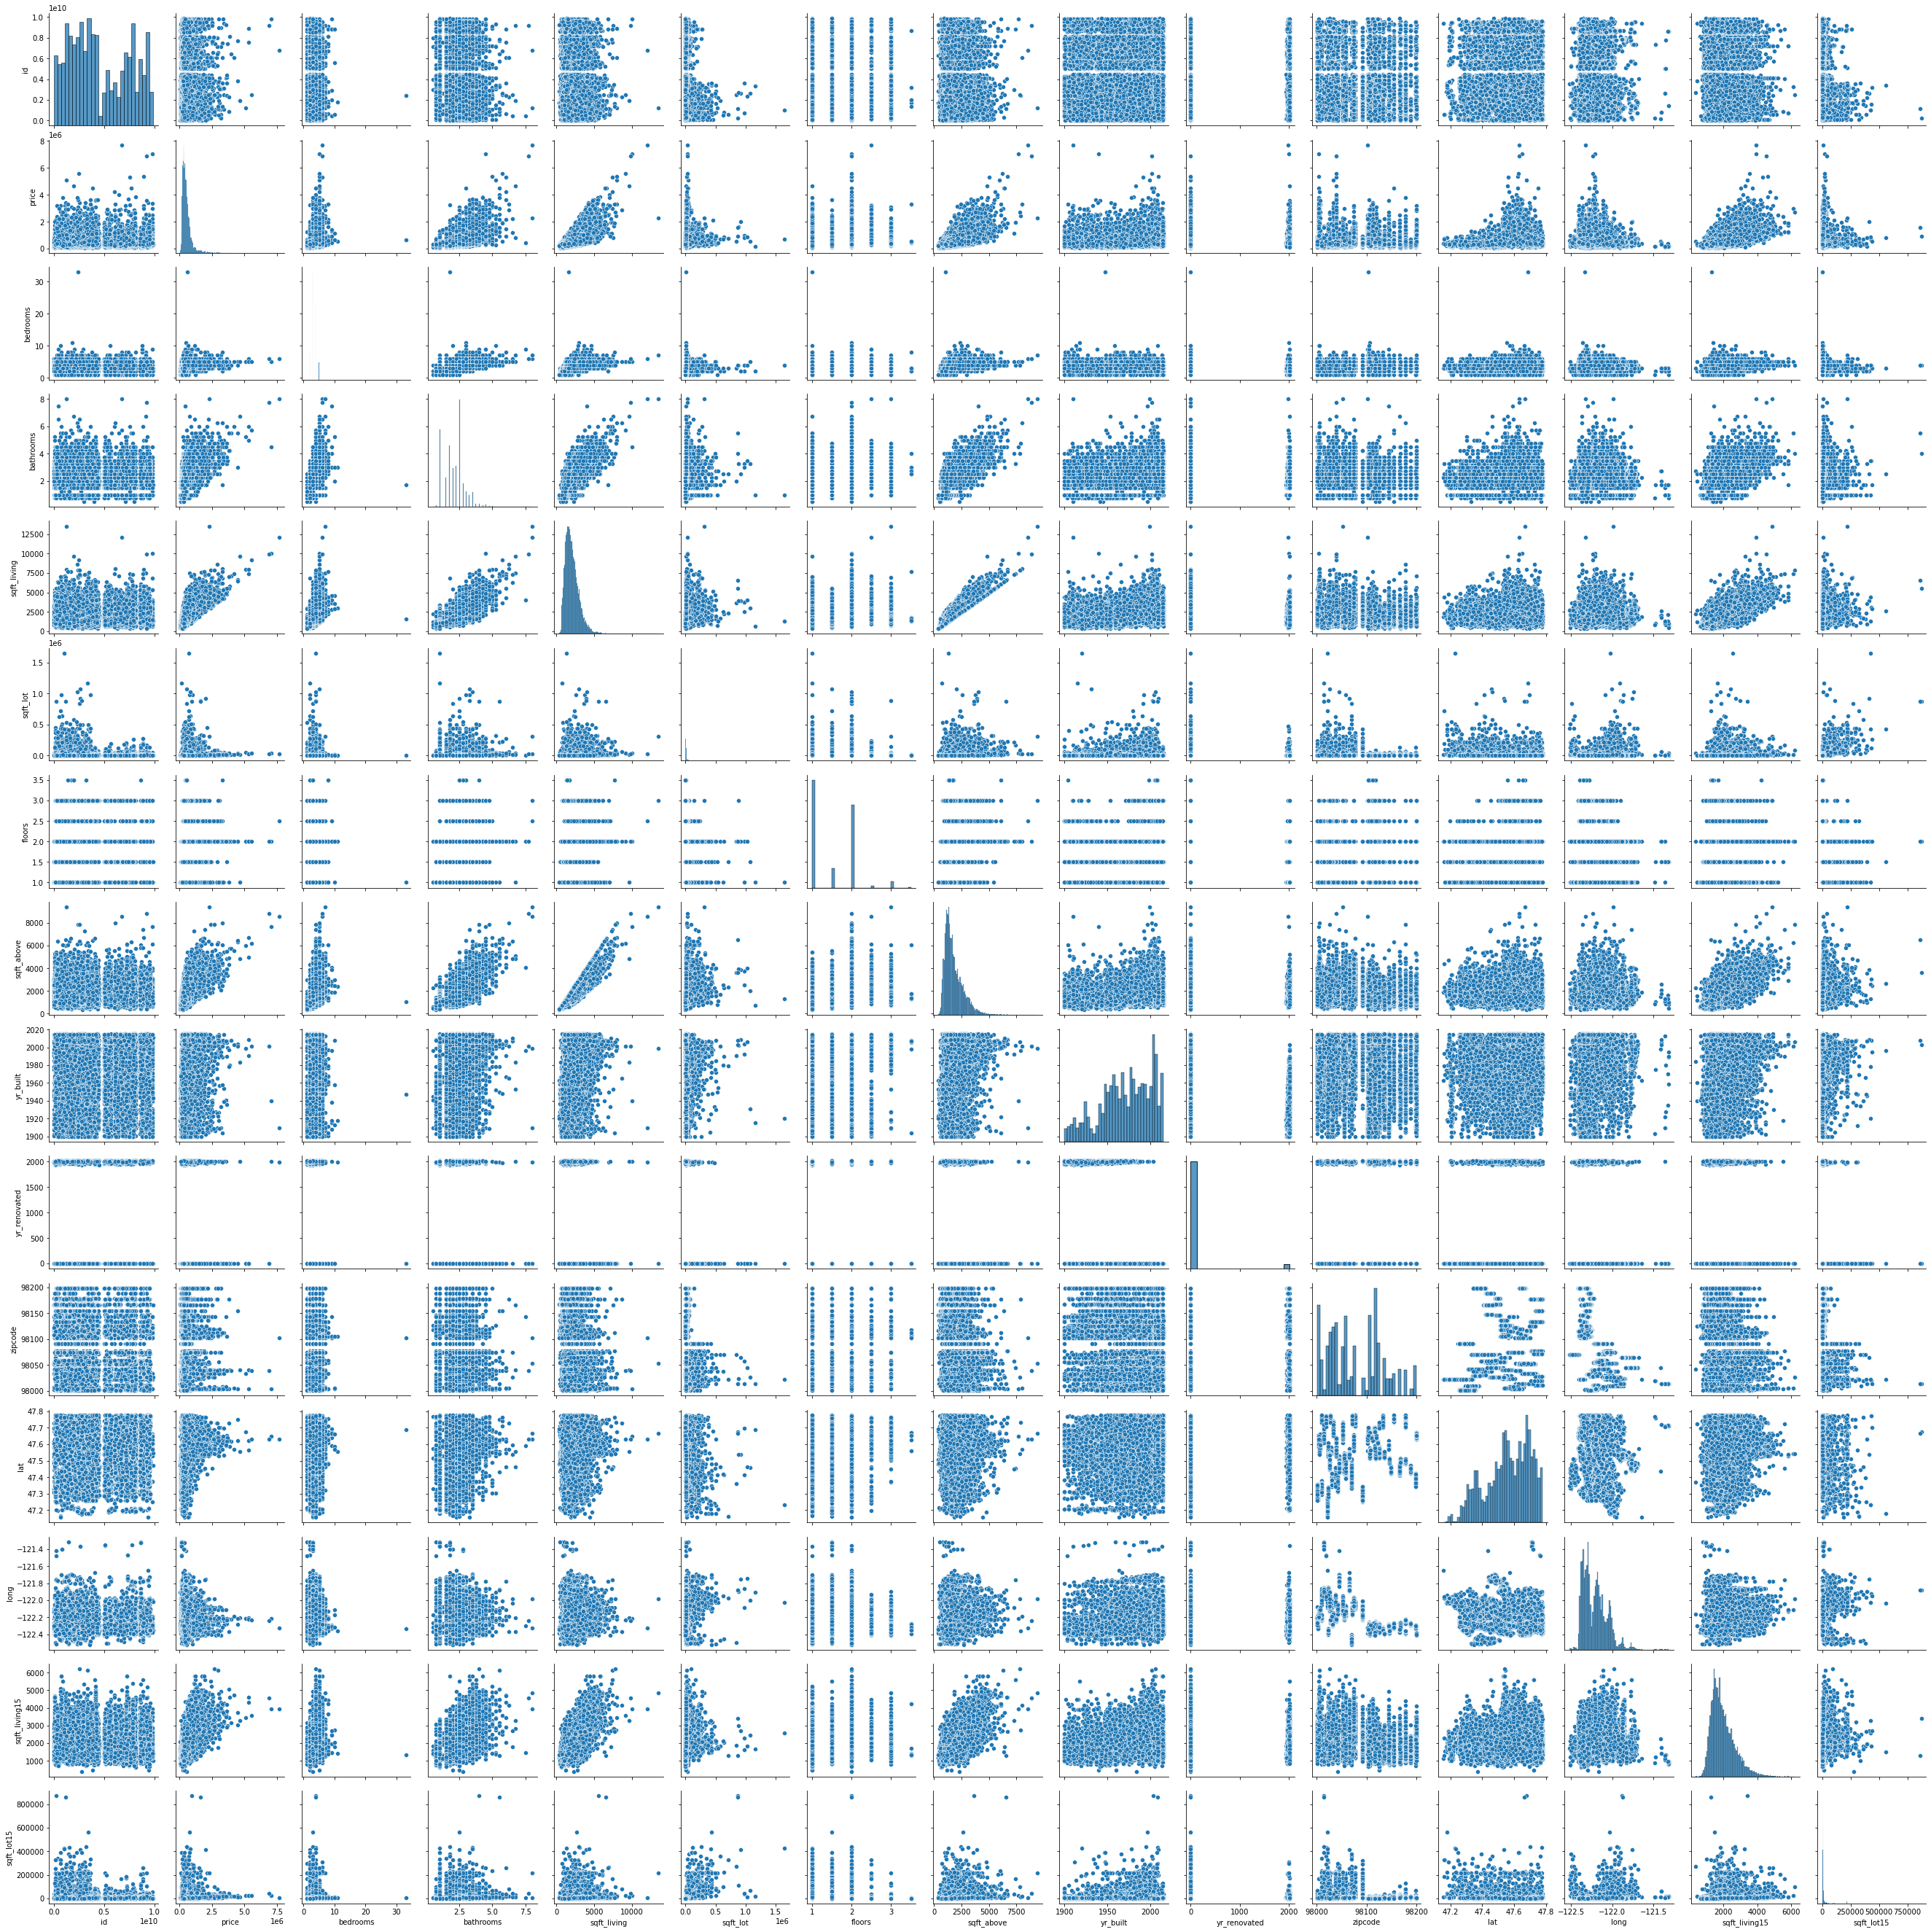

In [25]:
sns.pairplot(df);

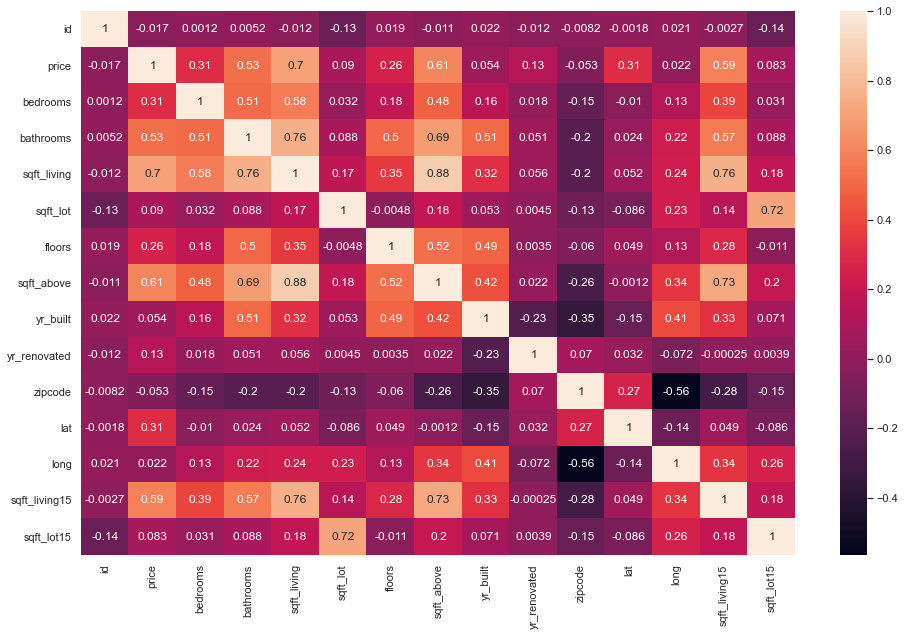

In [29]:
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df.corr(), annot=True);

Most correlated columns with price are:
iterations of sqft and # of bathrooms
Next step: baseline models with sqft and number of bathrooms 

We want to find middle class homes data and we will sort this out by finding mean price and using that to get 50% surrounding
mean

In [7]:
df['price'].mean()

540296.5735055795

In [8]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
#We are going to use houses within one std of mean
df['price'].std()

367368.1401013945

In [30]:
#filtering data, assuming that house prices within one std to be middle class home

In [10]:
from scipy.stats import zscore


In [14]:
zscore(df['price'])

array([-0.86671627, -0.00625157, -0.98077344, ..., -0.37618606,
       -0.38190525, -0.58606486])

In [15]:
df['price_z'] = zscore(df['price'])
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price_z  
0          0.0    98178  47.5112 -122.257           1340        5650 -0.866716  
1       1991.0    98125  47.7210 -122.319           1690        7639 -0.006252  
2          NaN    98028  47.7379 -122.233           2720        8062 -0.980773  
3          0.0    98136  47.5208 -122.393           1360        5000  0.173409  
4          0.0    98074  47.6168 -122.045           1800        7503 -0.082471  

[5 rows x 22 columns]

In [26]:
price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]

<ipython-input-26-1e813e1a4323>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]


In [29]:
price_z_df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  \
0          5650     1.0        NaN  NONE  ...       1180           0.0   
1          7242     2.0         NO  NONE  ...       2170         400.0   
2         10000     1.0         NO  NONE  ...        770           0.0   
3          5000     1.0         NO  NONE  ...       1050         910.0   
4          8080     1.0         NO  NONE  ...       1680           0.0   
...         ...     ...        ...   ...  ...        ...           ...   
21592      1131     3.0         NO  NONE  ...       1530           0.0   
21593      5813     2.0         NO  NONE  ...       2310           0.0   
21594      1350     2.0         NO  NONE  ...       1020           0.0   
21595      2388     2.0        NaN  NONE  ...       1600           0.0   
21596      1076     2.0         NO  NONE  ...       1020           0.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955          0.0    98178  47.5112 -122.257           1340   
1          1951       1991.0    98125  47.7210 -122.319           1690   
2          1933          NaN    98028  47.7379 -122.233           2720   
3          1965          0.0    98136  47.5208 -122.393           1360   
4          1987          0.0    98074  47.6168 -122.045           1800   
...         ...          ...      ...      ...      ...            ...   
21592      2009          0.0    98103  47.6993 -122.346           1530   
21593      2014          0.0    98146  47.5107 -122.362           1830   
21594      2009          0.0    98144  47.5944 -122.299           1020   
21595      2004          0.0    98027  47.5345 -122.069           1410   
21596      2008          0.0    98144  47.5941 -122.299           1020   

       sqft_lot15   price_z  
0            5650 -0.866716  
1            7639 -0.006252  
2            8062 -0.980773  
3            5000  0.173409  
4            7503 -0.082471  
...           ...       ...  
21592        1509 -0.490790  
21593        7200 -0.381905  
21594        2007 -0.376186  
21595        1287 -0.381905  
21596        1357 -0.586065  

[19205 rows x 22 columns]

In [30]:
# SQFT_Living for first linear regression
X = df['sqft_living']
Y = df['price']

In [31]:
model_no_intercept = sm.OLS(Y, X)
results_no_intercept = model_no_intercept.fit()
results_no_intercept.params

sqft_living    263.164736
dtype: float64

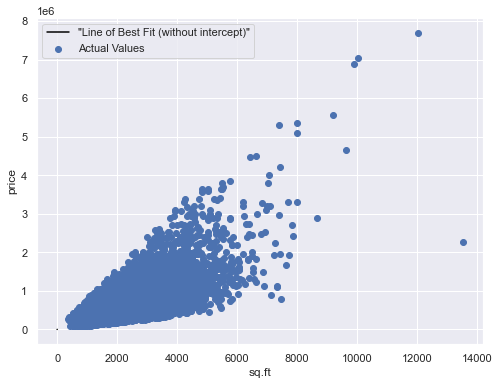

In [32]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, Y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(0, 4, 14000)
plt.plot(x_pred_range, results_no_intercept.predict(x_pred_range), 
         label='"Line of Best Fit (without intercept)"', color='black')

plt.ylabel('price')
plt.xlabel('sq.ft')
plt.legend()
plt.show()

In [33]:
results_no_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        09:50:19   Log-Likelihood:                     -3.0011e+05
No. Observations:               21597   AIC:                                  6.002e+05
Df Residuals:                   21596   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As SQFT increases, price increases. ^ Now we are going to do a baseline model for bathrooms and price!

In [34]:
X = df['bathrooms']
Y = df['price']

In [35]:
model_no_intercept = sm.OLS(Y, X)
results_no_intercept = model_no_intercept.fit()
results_no_intercept.params

bathrooms    254879.16331
dtype: float64

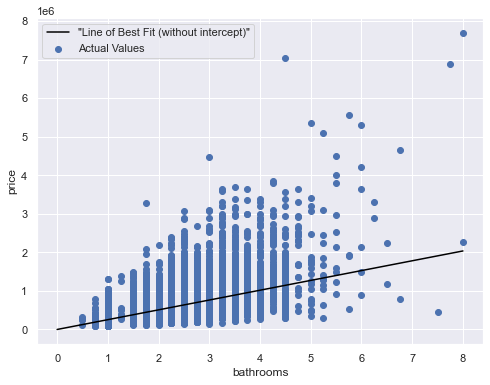

In [36]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, Y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(0, 8, 80)
plt.plot(x_pred_range, results_no_intercept.predict(x_pred_range), 
         label='"Line of Best Fit (without intercept)"', color='black')

plt.ylabel('price')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [37]:
results_no_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          7.282e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        09:50:25   Log-Likelihood:                     -3.0390e+05
No. Observations:               21597   AIC:                                  6.078e+05
Df Residuals:                   21596   BIC:                                  6.078e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   2.549e+05    944.498    269.857      0.000    2.53e+05    2.57e+05
==============================================================================
Omnibus:                    17124.797   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           862045.451
Skew:                           3.417   Prob(JB):                         0.00
Kurtosis:                      33.187   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OK, bathrooms increase value

cross reference floors, sqft, price  

In [38]:
sample = df.sample(1000)

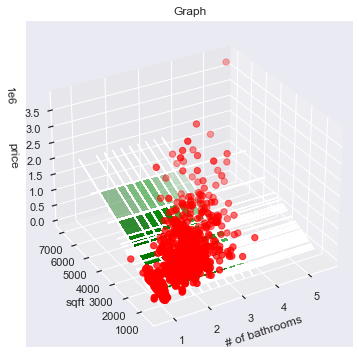

In [39]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(sample['bathrooms'], sample['sqft_living'], sample['price'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(sample['bathrooms'], sample['sqft_living'])

# multiple linear regression model with both inputs
results = sm.OLS(df['price'], sm.add_constant(df[['bathrooms', 'sqft_living']])).fit()
# calculate corresponding z using parameters from the above model
z = results.params['bathrooms'] * xx + results.params['sqft_living'] * yy + results.params['const']

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('# of bathrooms')
ax.set_ylabel('sqft')
ax.set_zlabel('price')
plt.title('Graph');

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:50:32   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.992e+04   5237.187     -7.622      0.000   -5.02e+04   -2.97e+04
bathrooms   -5095.2734   3535.830     -1.441      0.150    -1.2e+04    1835.215
sqft_living   284.0883      2.962     95.926      0.000     278.284     289.893
==============================================================================
Omnibus:                    14783.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           540478.758
Skew:                           2.815   Prob(JB):                         0.00
Kurtosis:                      26.852   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Positive correlation between all of them. Next look at relationships within diff types of sqft

In [41]:
import plotly.graph_objects as go

In [42]:
import plotly.express as px

fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price')
fig.show()

In [43]:
#Going to focus on certain columns and drop others from df
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [47]:
#id = irrelevant as with date, lat and long not useful, cant change the zipcode of the house and cannot change waterfront 
#and view. low correlation with yr built and yr renovated
df_new = df.drop(columns = ['id', 'date', 'lat', 'long', 'zipcode', 'waterfront', 'view', 'yr_built', 'yr_renovated'])

In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  object 
 7   grade          21597 non-null  object 
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  sqft_living15  21597 non-null  int64  
 11  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.0+ MB


In [62]:
df_new['sqft_basement'] = df_new['sqft_living'] - df_new['sqft_above']

In [63]:
df_new['sqft_basement'].head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int64

In [64]:
df_new.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0    Average   
1  538000.0         3       2.25         2570      7242     2.0    Average   
2  180000.0         2       1.00          770     10000     1.0    Average   
3  604000.0         4       3.00         1960      5000     1.0  Very Good   
4  510000.0         3       2.00         1680      8080     1.0    Average   

           grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  
0      7 Average        1180              0           1340        5650  
1      7 Average        2170            400           1690        7639  
2  6 Low Average         770              0           2720        8062  
3      7 Average        1050            910           1360        5000  
4         8 Good        1680              0           1800        7503

In [65]:
type(df_new['sqft_basement'])
df_new['sqft_basement'].astype(int)

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

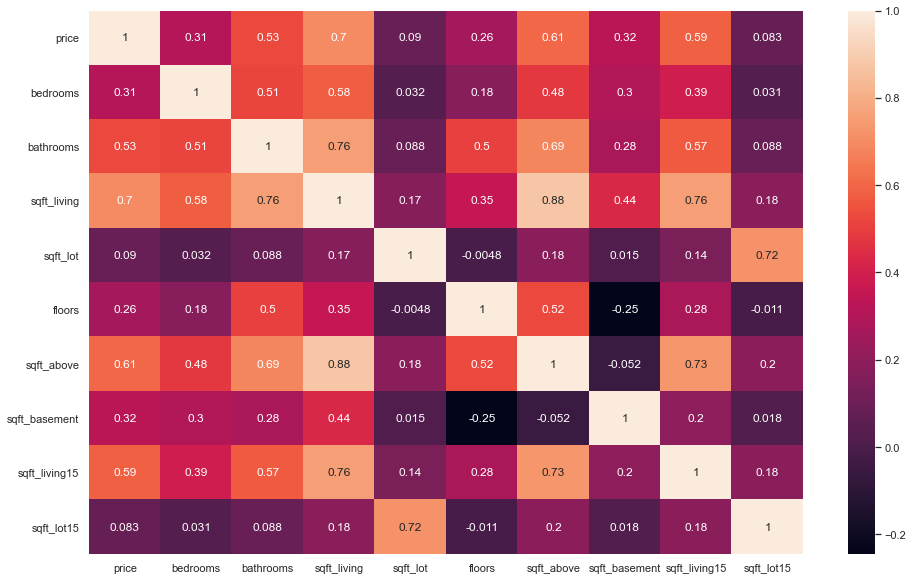

In [66]:
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df_new.corr(), annot=True);

In [68]:
# I want to make a linear regression comparing different types of sqft to price. do basements make house more expensive? 
#is it better to have multiple stories
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.25, random_state=42)

In [ ]:
def evaluate_model(X_train, X_test, y_train, y_test)
'''
Need to write a good docstring here'''
#create and fit model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
#Print summary
print(model.summary())
#Grab predictions
test_preds
train_preds
#evaluate on train and test

#visualize residuals 